<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="skyblue">University of Tehran</i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>
    </div>
</div>

<h1 style = "color:orange;" dir = "ltr"> <b>
    Mahdi Naeeni
</b> </h1>

<h1 style = "color:orange;" dir = "ltr"> <b>
    SID: 810101536
</b> </h1>

<h1 style = "color:orange;" dir = "ltr"> <b>
    U-Net for CamVid Segmentation
</b> </h1>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Table of Contents
</b> </h1>

- [Introduction](#intro)

- [Image Segmentation](#unet)  

    - [Libraries](#unet_libraries)

    - [Exploring the Dataset and Preprocessing](#unet_exploring)

    - [Building Model](#unet_building)

    - [Training Model](#unet_training)

    - [Evaluate Model](#unet_evaluate)

- [References](#references)

<a id='intro'></a>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Introduction
</b> </h1>

Deep learning, a subset of machine learning, is at the heart of many recent advances in artificial intelligence. From self-driving cars to voice assistants and image recognition systems, deep learning powers a wide range of technologies by enabling machines to learn from vast amounts of data. Unlike traditional machine learning, deep learning utilizes artificial neural networks, which are inspired by the structure of the human brain, to identify patterns, make decisions, and improve over time.

In this notebook, We'll learn how to build, train, and evaluate models using popular libraries like TensorFlow and Keras. By the end of this course, we'll have a solid understanding of how to apply deep learning techniques to real-world tasks such as image segmentation and more.

<a id='unet'></a>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Image Segmentation
</b> </h1>

<a id='unet_libraries'></a>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Libraries:
</b> </h1>

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers

We'll be building a U-Net, a specialized type of Convolutional Neural Network (CNN) designed for fast and accurate image segmentation. Our goal is to predict a label for every pixel in an image—in this case, from a camvid dataset.

This approach is known as semantic image segmentation. Like object detection, it aims to answer the question: "What objects are in this image, and where are they located?" However, while object detection identifies objects with bounding boxes, potentially including irrelevant pixels, semantic segmentation provides a more precise output by labeling every pixel with its respective class. In other words, instead of enclosing objects in a box, semantic segmentation creates a mask for each object, defining its exact shape and boundaries. The term "semantic" refers to the meaning of the object in the image— for instance, in the example below, the "Car" class is represented by a dark blue mask, while the "Person" class is shown with a red mask.

<img width=500 height=350 src="https://storage.googleapis.com/wandb-production.appspot.com/wandb_fc/images/views/5469819/preview.png?md5=9056b25ede347dbd2a1f0ab7217aba74" align=center>

The CamVid dataset (Cambridge-driving Labeled Video Database) is a well-known benchmark dataset used primarily for semantic segmentation tasks in computer vision. It consists of video sequences captured from a moving vehicle, with each frame manually annotated with object classes such as cars, pedestrians, roads, trees, and buildings. The dataset provides over 700 labeled frames at a resolution of 960x720 pixels, featuring 32 semantic classes, although only 11 are commonly used in most segmentation tasks. CamVid is widely used for training and evaluating models that deal with scene understanding in autonomous driving.

<a id='unet_exploring'></a>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Exploring the Dataset and Preprocessing:
</b> </h1>

In [ ]:
!pip install kaggle

!kaggle datasets download carlolepelaars/camvid

!unzip camvid.zip -d camvid

Dataset URL: https://www.kaggle.com/datasets/carlolepelaars/camvid
License(s): CC-BY-NC-SA-4.0
 99% 569M/575M [00:11<00:00, 40.3MB/s]
100% 575M/575M [00:11<00:00, 54.6MB/s]
Archive:  camvid.zip
  inflating: camvid/CamVid/class_dict.csv  
  inflating: camvid/CamVid/test/0001TP_006690.png  
  inflating: camvid/CamVid/test/0001TP_006720.png  
  inflating: camvid/CamVid/test/0001TP_006750.png  
  inflating: camvid/CamVid/test/0001TP_006780.png  
  inflating: camvid/CamVid/test/0001TP_006810.png  
  inflating: camvid/CamVid/test/0001TP_006840.png  
  inflating: camvid/CamVid/test/0001TP_006870.png  
  inflating: camvid/CamVid/test/0001TP_006900.png  
  inflating: camvid/CamVid/test/0001TP_006930.png  
  inflating: camvid/CamVid/test/0001TP_006960.png  
  inflating: camvid/CamVid/test/0001TP_006990.png  
  inflating: camvid/CamVid/test/0001TP_007020.png  
  inflating: camvid/CamVid/test/0001TP_007050.png  
  inflating: camvid/CamVid/test/0001TP_007080.png  
  inflating: camvid/CamVid/test/00

In this part we prepare image and label datasets for semantic segmentation tasks, using the CamVid dataset.

1. `make_image_files`: This function retrieves and organizes image and label file paths from the specified directory for either training, validation, or testing datasets. It returns a dictionary containing sorted lists of image and label file paths.

2. `load_image_and_mask`: This function loads and processes both images and corresponding mask labels. It reads the image and mask, decodes them as PNG files, normalizes pixel values to a range of 0 to 1, and resizes them to the specified dimensions.

3. `load_dataset`: This function creates a TensorFlow dataset using the image and mask files. It loads, shuffles, batches, and prefetches the data, which improves efficiency when training the model.

After defining the functions we mounts the dataset directory and prepares train, validation, and test datasets. The img_size is set to (256, 256) and the batch size to 32.

In [ ]:
def make_image_files(type= "train"):
    images_path = f'/content/camvid/CamVid/{type}'
    labels_path = f'/content/camvid/CamVid/{type}_labels'

    image_files = {}
    image_files["images"] = sorted(glob(os.path.join(images_path, '*.png')))
    image_files["labels"] = sorted(glob(os.path.join(labels_path, '*.png')))
    return image_files

def load_image_and_mask(image_file, mask_file, img_size=(256, 256)):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_png(image, channels=3) 
    image = tf.image.convert_image_dtype(image, tf.float32) 
    image = tf.image.resize(image, img_size)

    mask = tf.io.read_file(mask_file)
    mask = tf.image.decode_png(mask, channels=3) 
    mask = tf.image.convert_image_dtype(mask, tf.float32) 
    mask = tf.image.resize(mask, img_size)

    return image, mask

def load_dataset(image_files, mask_files, batch_size=32, img_size=(256, 256)):
    dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))
    dataset = dataset.map(lambda img, mask: load_image_and_mask(img, mask, img_size), num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=len(image_files)).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

In [ ]:
# drive.mount('/content/drive')
path = '/content/camvid/CamVid'
print("Available files:", os.listdir(path))

batch_size = 32
img_size = (256, 256)

train_files = make_image_files("train")
train_dataset = load_dataset(train_files["images"], train_files["labels"], batch_size=batch_size, img_size=img_size)

val_files = make_image_files("val")
val_dataset = load_dataset(val_files["images"], val_files["labels"], batch_size=batch_size, img_size=img_size)

test_files = make_image_files("test")
test_dataset = load_dataset(test_files["images"], test_files["labels"], batch_size=batch_size, img_size=img_size)

print(f"train dataset: {len(train_dataset)}")
print(f"val dataset: {len(val_dataset)}")
print(f"test dataset: {len(test_dataset)}")

Available files: ['test_labels', 'test', 'class_dict.csv', 'val', 'train_labels', 'train', 'val_labels']
train dataset: 12
val dataset: 4
test dataset: 8


We read the a CSV file containing class labels and their associated properties for a dataset, that used for image segmentation tasks. The DataFrame `class_dict` will store the data from the CSV, making it easy to access and manipulate class-related information for further processing.

In [ ]:
class_dict_path = '/content/camvid/CamVid/class_dict.csv'
class_dict = pd.read_csv(class_dict_path)
class_dict

,name,r,g,b
0,Animal,64,128,64
1,Archway,192,0,128
2,Bicyclist,0,128,192
3,Bridge,0,128,64
4,Building,128,0,0
5,Car,64,0,128
6,CartLuggagePram,64,0,192
7,Child,192,128,64
8,Column_Pole,192,192,128
9,Fence,64,64,128


We generate a 3D scatter plot using Plotly to visualize RGB color values associated with different class labels from a dataset. We read the RGB values and class names from `class_dict`, format the colors as rgb(r, g, b), and then we create a 3D scatter plot.

In [ ]:
r = class_dict['r']
g = class_dict['g']
b = class_dict['b']
labels = class_dict['name']

colors = [f'rgb({r_val}, {g_val}, {b_val})' for r_val, g_val, b_val in zip(r, g, b)]

fig = go.Figure(data=[go.Scatter3d(x=r, y=g, z=b, mode='markers', marker=dict(size=8, color=colors, opacity=0.8),text=labels)])

fig.update_layout(scene=dict( xaxis_title='Red (R)', yaxis_title='Green (G)', zaxis_title='Blue (B)'),
                  title='3D Scatter Plot of RGB Values for Classes', hovermode='closest')

fig.show()

We define a function `plot_image_and_mask` that visualizes an image alongside its corresponding segmentation mask. The function takes two inputs: the original image and the segmentation mask. It creates a side-by-side comparison of both, plotting them in a 1x2 grid and then displays the result.

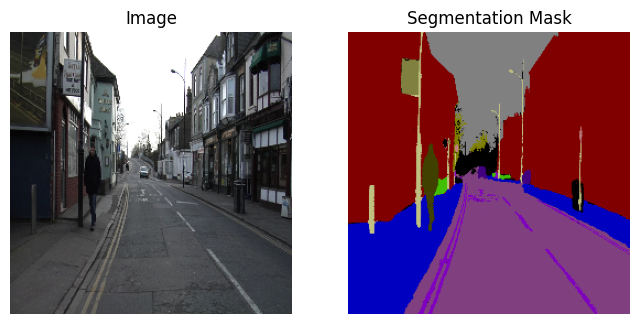

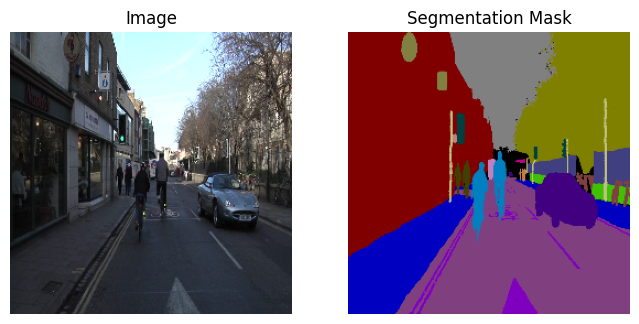

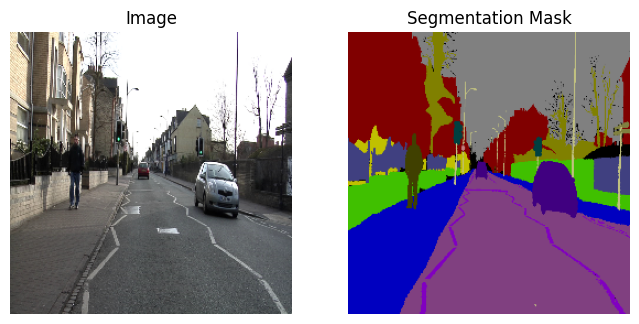

In [ ]:
def plot_image_and_mask(X_image, y_image):
    fig, axes  = plt.subplots(1, 2, figsize=(8, 6))
    axes [0].imshow(X_image)
    axes [0].set_title('Image')
    axes [0].axis("off")
    axes [1].imshow(y_image)
    axes [1].set_title('Segmentation Mask')
    axes [1].axis("off")
    plt.show()

for images, masks in train_dataset.take(3):
    plot_image_and_mask(images[7], masks[7])

<a id='unet_building'></a>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Building Model:
</b> </h1>

In this part we implement a U-Net model for image segmentation using the CamVid dataset. U-Net is a popular architecture for semantic segmentation tasks. The network consists of an encoder-decoder structure with a series of convolutional layers, followed by pooling in the encoder path to downsample features, and transposed convolution layers in the decoder path for upsampling. Skip connections are used between the encoder and decoder to help the model retain spatial information, which is important for accurate segmentation. Batch normalization, ReLU activation, and dropout layers are applied to enhance model generalization and stability. The output layer uses a sigmoid activation function, indicating it is designed for multi-class segmentation.

In [ ]:
def Conv2dBlock(inputs, num_filters, kernel_size = 3):
    x = layers.Conv2D(num_filters, kernel_size = kernel_size, kernel_initializer = 'he_normal', padding = 'same') (inputs)
    x = layers.BatchNormalization()(x)
    x =layers.Activation('relu')(x)

    x = layers.Conv2D(num_filters, kernel_size = kernel_size, kernel_initializer = 'he_normal', padding = 'same') (x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    return x


def build_unet_model(input_shape, droupouts_rate = 0.1):
    # Encoder Path
    input_image = layers.Input(input_shape)

    c1 = Conv2dBlock(input_image, 16, kernel_size = 3)
    p1 = layers.MaxPooling2D((2,2), padding='same')(c1)
    p1 = layers.Dropout(droupouts_rate)(p1)

    c2 = Conv2dBlock(p1, 32, kernel_size = 3)
    p2 = layers.MaxPooling2D((2,2), padding='same')(c2)
    p2 = layers.Dropout(droupouts_rate)(p2)

    c3 = Conv2dBlock(p2, 64, kernel_size = 3)
    p3 = layers.MaxPooling2D((2,2), padding='same')(c3)
    p3 = layers.Dropout(droupouts_rate)(p3)

    c4 = Conv2dBlock(p3, 128, kernel_size = 3)
    p4 = layers.MaxPooling2D((2,2), padding='same')(c4)
    p4 = layers.Dropout(droupouts_rate)(p4)

    c5 = Conv2dBlock(p4, 256, kernel_size = 3)

    # Decoder path
    u6 = layers.Conv2DTranspose(128, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = layers.concatenate([u6, c4])
    u6 = layers.Dropout(droupouts_rate)(u6)
    c6 = Conv2dBlock(u6, 128, kernel_size = 3)

    u7 = layers.Conv2DTranspose(64, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = layers.concatenate([u7, c3])
    u7 = layers.Dropout(droupouts_rate)(u7)
    c7 = Conv2dBlock(u7, 64, kernel_size = 3)

    u8 = layers.Conv2DTranspose(32, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = layers.concatenate([u8, c2])
    u8 = layers.Dropout(droupouts_rate)(u8)
    c8 = Conv2dBlock(u8, 32, kernel_size = 3)

    u9 = layers.Conv2DTranspose(16, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = layers.concatenate([u9, c1])
    u9 = layers.Dropout(droupouts_rate)(u9)
    c9 = Conv2dBlock(u9, 16, kernel_size = 3)

    output = layers.Conv2D(3, (1, 1), activation = 'sigmoid')(c9)
    model = tf.keras.Model(inputs = [input_image], outputs = [output])
    return model

inputs_shape = img_size + (3,)
model = build_unet_model(inputs_shape, droupouts_rate= 0.07)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 16)   │             64 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 256, 256, 16)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 16)   │          2,320 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 256, 16)   │             64 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 256, 256, 16)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 16)   │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128, 128, 16)   │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 32)   │          4,640 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 128, 32)   │            128 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 128, 128, 32)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128, 128, 32)   │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 128, 128, 32)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 32)     │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)  

 Total params: 2,164,627 (8.26 MB)

 Trainable params: 2,161,683 (8.25 MB)

 Non-trainable params: 2,944 (11.50 KB)

<a id='unet_training'></a>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Training Model:
</b> </h1>

The model is being compiled with the Adam optimizer, which adjusts the learning rate during training, and the binary cross-entropy loss function. The metric used to evaluate performance during training is accuracy.

The model is then trained on the `train_dataset` for 150 epochs, with validation against `val_dataset` at each epoch to monitor performance and prevent overfitting. The history of the training process, including metrics like loss and accuracy over epochs, is stored in the `history` variable.

In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

history = model.fit(train_dataset, epochs = 150, validation_data= val_dataset)

Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.3677 - loss: 0.7453 - val_accuracy: 0.1557 - val_loss: 2.8442
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 68s 535ms/step - accuracy: 0.4882 - loss: 0.6674 - val_accuracy: 0.2867 - val_loss: 5.1689
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 535ms/step - accuracy: 0.5478 - loss: 0.6345 - val_accuracy: 0.7315 - val_loss: 2.1175
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 758ms/step - accuracy: 0.5504 - loss: 0.6123 - val_accuracy: 0.6688 - val_loss: 1.7556
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 758ms/step - accuracy: 0.5668 - loss: 0.5969 - val_accuracy: 0.4281 - val_loss: 2.3441
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 597ms/step - accuracy: 0.5670 - loss: 0.5865 - val_accuracy: 0.5442 - val_loss: 0.6610
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 540ms/step - accuracy: 0.5490 - loss: 0.5781 - val_accuracy: 0.3884 - val_loss: 1.3039
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 544ms/step - accuracy: 0.5666 - loss: 0.5723 - va

This function, `plot_acc_and_loss_history`, is designed to visualize the training and validation performance of model over time. It takes the training history (containing metrics such as accuracy and loss) and plots two graphs: one showing the model's training and validation accuracy across epochs, and another showing the training and validation loss. The function helps in evaluating the model's learning progress and determining whether it is overfitting or underfitting. After model evaluation on a test dataset, the function is used to display the plots.

In [ ]:
def plot_acc_and_loss_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = len(loss)
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xticks(np.arange(0, epochs+1, 25))

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xticks(np.arange(0, epochs+1, 25))
    plt.tight_layout()
    plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 808ms/step - accuracy: 0.7325 - loss: 0.5490


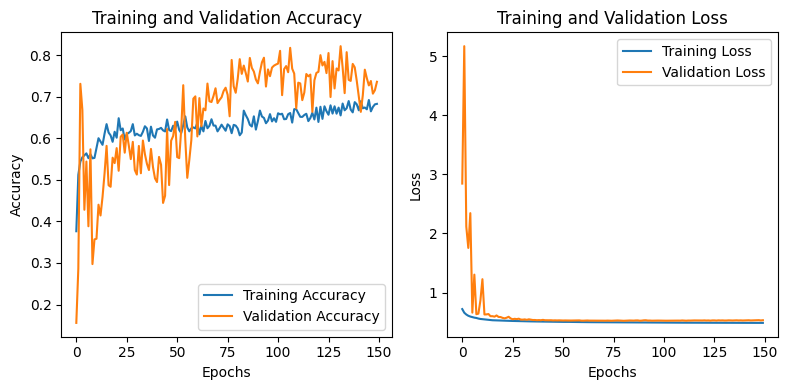

In [ ]:
model.evaluate(test_dataset)
plot_acc_and_loss_history(history)

<a id='unet_evaluate'></a>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Evaluate Model:
</b> </h1>

In this final section we visualize the performance of a U-Net model for image segmentation on the CamVid dataset. The function `plot_image_and_mask()` displays the input image, the ground truth segmentation mask, and the model's predicted mask (referred to as the "constructed image") side by side for a clear comparison.



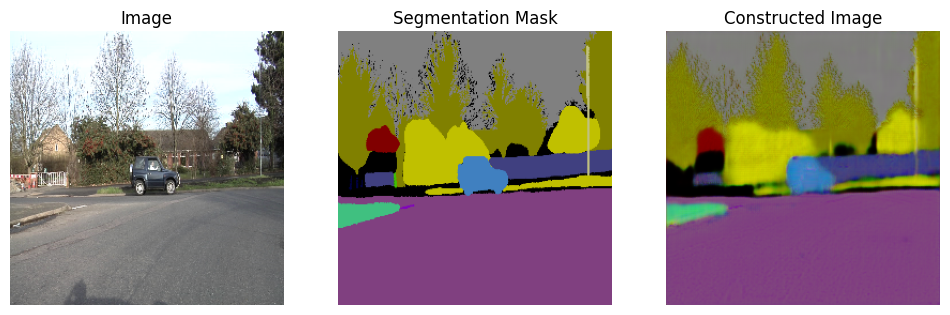

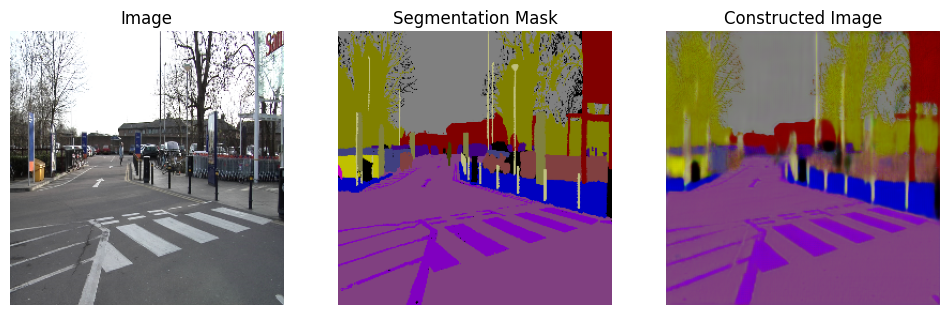

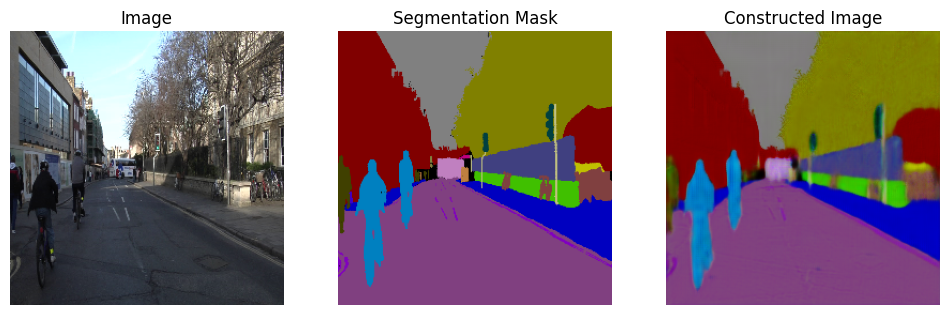

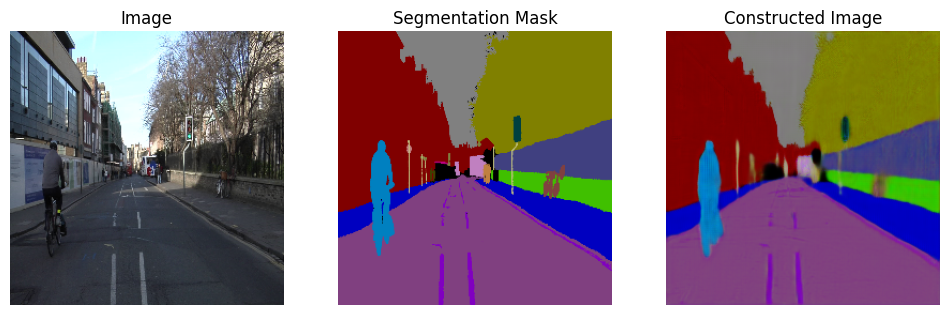

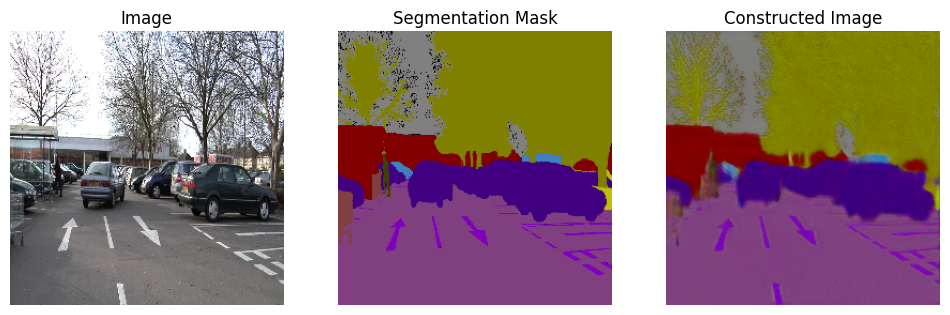

In [ ]:
def plot_image_and_mask(X_image, y_image, c_image):
    fig, axes  = plt.subplots(1, 3, figsize=(12, 6))
    axes [0].imshow(X_image)
    axes [0].set_title('Image')
    axes [0].axis("off")
    axes [1].imshow(y_image)
    axes [1].set_title('Segmentation Mask')
    axes [1].axis("off")
    axes [2].imshow(c_image)
    axes [2].set_title('Constructed Image')
    axes [2].axis("off")
    plt.show()

for images, masks in test_dataset.take(5):
    index = 5
    constructed_images = model.predict(images)
    plot_image_and_mask(images[index], masks[index], constructed_images[index])


<a id='references'></a>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    References
</b> </h1>

- https://www.tensorflow.org/tutorials/generative/autoencoder

- https://medium.com/chat-gpt-now-writes-all-my-articles/introduction-to-all-types-of-autoencoders-with-python-ec0e47b5e1b9

- https://mriquestions.com/upsampling.html

- https://www.frontiersin.org/journals/aging-neuroscience/articles/10.3389/fnagi.2022.841297/full